# Machine Learning Engineer Nanodegree
## Deep Learning
## Project: Build a Digit Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os as os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import PIL
from PIL import Image
from scipy import misc
import random
import pandas as pd
import tensorflow as tf
import h5py
import math
import matplotlib.patches as patches

----
## Step 1: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. Train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, you can for example limit yourself to sequences up to five digits, and use five classifiers on top of your deep network. You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0))

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### see "STEP-1_digit_recognition-training-syntheticdataset.ipynb"

### Question 1
_What approach did you take in coming up with a solution to this problem?_

**Answer:** 

After reading the paper by Goodfellow, I figured the best way was to have a 'simple' feedforward CNN with five softmax classifiers (for each digit)

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer:**

My architecture is as follows:

data (batch, 64, 64, 1) 64x64 image in greyscale

Then 3 Convolutional Layers, hidden relu layer and maxpooling between each

Then I reshape the data and feed directly into a fully connected layers for each digit and then to the individual logits for each digit.

Not as deep, but similar to goodfellow et al

### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.

**Answer:**

The examples are in the file.  I created a synthetic dataset by randomly mixing digits from the MNIST dataset,  then resizing them into square 64x64 greyscale images.  The images had random lengths from 1-5 digits.

I trained the model using ~20K-100K steps.  I minimized the loss fucntion from the 5 classifiers using the AdamOptimizer()

I achieved reasonable accuracy on my test_set:

digit  1 :  0.9

digit  2 :  0.777777777778

digit  3 :  0.8

digit  4 :  0.731707317073

digit  5 :  0.826086956522

----
## Step 2: Train a Model on a Realistic Dataset
Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### see:

### "STEP-2_2_digit_recognition-SVHNcleaning.ipynb"  AND
### "STEP-2_2_digit_recognition-SVHNtraining.ipynb"


### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_

**Answer:**

I first cleaned the data.  I cropped the images with the bounding boxes, made greyscale and then normalized.  I used the same train and test set from the SVHN tar balls (format 1)

The model performs well as judged by the accuracy at each digit for a sample of the test set 

digit  1 :  0.754

digit  2 :  0.516

digit  3 :  0.804

digit  4 :  0.982

digit  5 :  1.0

However, for absolute accuracy, the model is only correct 36.6% of the time.  It seems to generally be close, but usually one digit is off.

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_

**Answer:**

I hadn't read all of the questions when I did this (e.g training of a localizer in paralell in step 4).  I achieved 'good' results with the same model but I added extra convolutional layers.  In goodfellow et al.  they used 8 so I used 8.  A major help was using the bounding boxies to crop, resize and normalize the images. Without this, the model performs very poorly. 

Also I adjusted the learning rate to find an optimal value.  That had biggest effect.  Changing the width of the layers seemed to have little effect (e.g. width versus depth. paradigm). Most of the other parameters had less of an effect.



### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_

**Answer:**

see above

----
## Step 3: Test a Model on Newly-Captured Images

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### See "STEP3_digits_around_myhouse.ipynb"

### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?



**Answer:**

For the simple images, they were mostly just numbers.  A couple of others, like a license plate I found on google images had other text and as a result the prediction was poor.  Another image that was challenging was a digital clock where the font was box like and had a lot of background from the LED display.  

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

**Answer:**

I'd say it was close, but definitely not as well. It was as good at predicting images that were cropped and prepared the same way as the training data.  Anything zoomed out, it performed terribly.

[ 8  3 10 10 10]


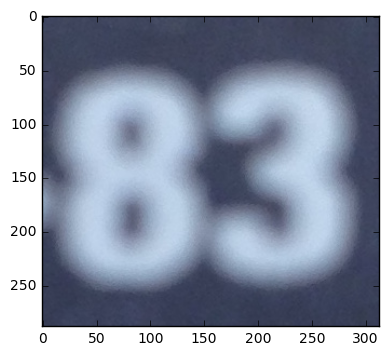

[ 5  9  1 10 10]


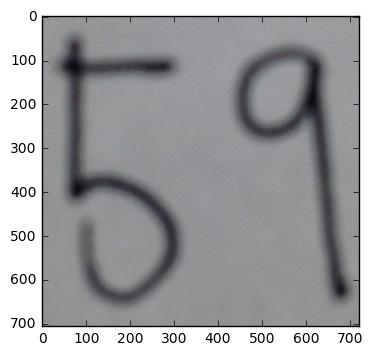

[ 3  2 10 10 10]


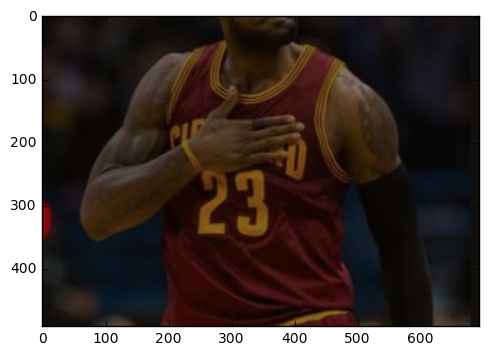

[ 2 10 10 10 10]


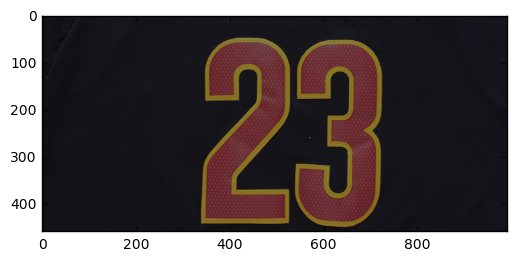

[ 2  4  1 10 10]


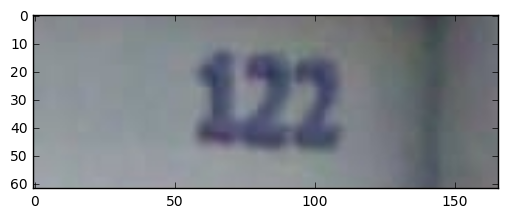

[ 4  5 10 10 10]


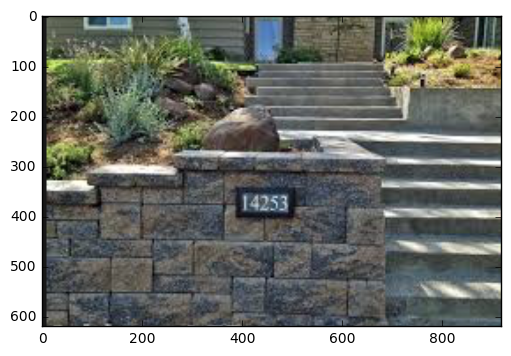

[ 1  0  7 10 10]


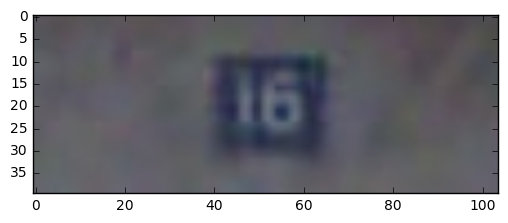

In [32]:
import STEP3_Model_Predict as model
file_names = ['image3.jpg', 'image1.jpg', 'image1.png', 'image2.png', 'image7.png', 'image9.png',  '22.png' ]
for i in file_names:
    model.predict_show(i, '/STEP2_2_model.ckpt')

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

**Answer:** Leave blank if you did not complete this part.

----
# Step 4: Explore an Improvement for a Model

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### See "STEP4_digit_recognition-SVHNtraining_model2"

### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_

**Answer:**

I decided to keep things simple.  I trained my model with four additional logits for each of the four corners of the whole digit. I rounded the labels to the outside 10th pixel. I did this to limit the number of labels.  Therefore the bounding boxes represent coordinates on a ~6 x 6 grid in the resized images that are 64 x 64.  This model actually performs pretty well.  I also limited the number of convulutiional layers to 4 so that I could train it faster.  The rest was the same.


I tried simply training my model in STEP 2 (e..g no bbox logits) with the uncropped images and it performed very poorly.  I was surprised though with simple bounding box labels, the model started to perform well or least get it close.    

This is my accuracy on my test set, not used in training:

digit  1 :  0.45
digit  2 :  0.392
digit  3 :  0.718
digit  4 :  0.984
digit  5 :  1.0
overall accuracy:  22.8

I consider this a 'good' result becuase I trained this on an older laptop (4GB ram, 2.0 Mhz intel i5) with a very simple model

I could further improve, by using a 'deeper' network, and possibly even include bounding boxes for each digit instead of the four corners around the digit.

Also, I think preprocessing better with whitening or soemthing would probably help too.  ALot fo the images I used are alot higher resolution and are busier than the SVHN set 


### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

[ 1  3  2  2 10  0  6  2  3]


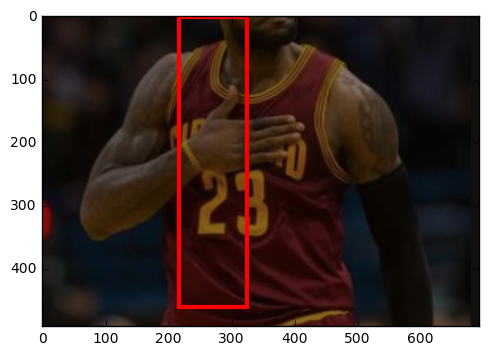

[ 2  2 10 10 10  0  6  2  5]


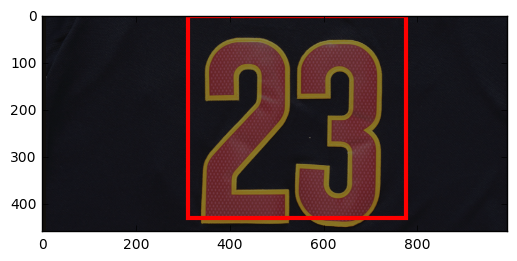

[ 1  2  3 10 10  0  6  2  3]


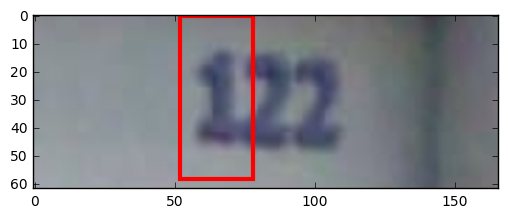

[ 3  8  4 10 10  1  4  2  5]


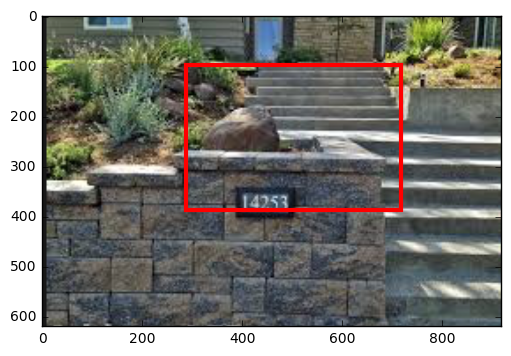

[ 1  3  3 10 10  1  5  2  4]


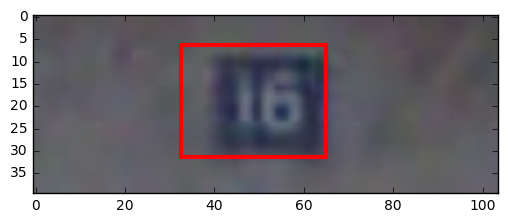

In [34]:
import STEP4_Model_Predict as model
file_names = ['image1.png', 'image2.png', 'image7.png', 'image9.png',  '22.png' ]
for i in file_names:
    model.predict_show(i, '/STEP4_model2.ckpt')

**Answer:**

----
## Optional Step 5: Build an Application or Program for a Model
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:


### Your optional code implementation goes here.
### Feel free to use as many code cells as needed.



### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.